<a href="https://colab.research.google.com/github/jyj1206/SoloDeepLearning/blob/main/Chapter3_Multi_Class_Classification_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch 불러오기
import torch
print(torch.__version__)

2.4.1+cu121


In [2]:
# 나머지 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# 데이터셋 정의
r = np.random.rand(10000) * 3
theta = np.random.rand(10000) * 2 * np.pi
y = r.astype(int)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

In [57]:
# 훈련, 검증, 테스트 데이터로 split
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

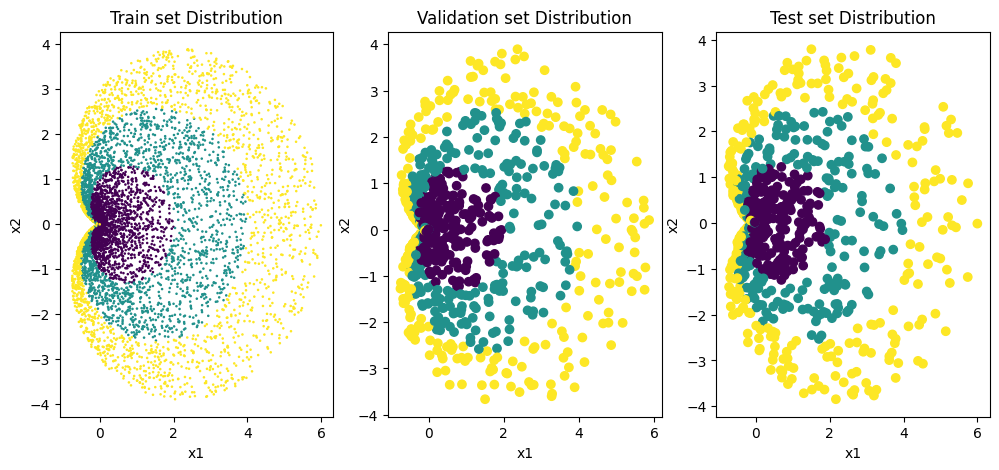

In [7]:
# 데이터셋 시각화
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train set Distribution')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:,0], val_X[:,1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:,0], test_X[:,1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test set Distribution')

plt.show()

In [10]:
# Multi-Label Logistic Model (Linear Model) 정의
import torch.nn as nn
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = nn.Linear(in_features=2, out_features=3, bias=True)

  def forward(self, x):
    return self.linear(x)

In [20]:
# MLPModel 정의
class MLPModel(nn.Module):
	def __init__(self):
		super(MLPModel, self).__init__()
		self.linear1 = nn.Linear(in_features=2, out_features=200)
		self.linear2 = nn.Linear(in_features=200, out_features=3)
		self.relu = nn.ReLU()

	def forward(self, x):
		x = self.linear1(x)
		x = self.relu(x)
		x = self.linear2(x)
		return x

In [21]:
# Cost function 정의
cls_loss = nn.CrossEntropyLoss()

1203 Parameters


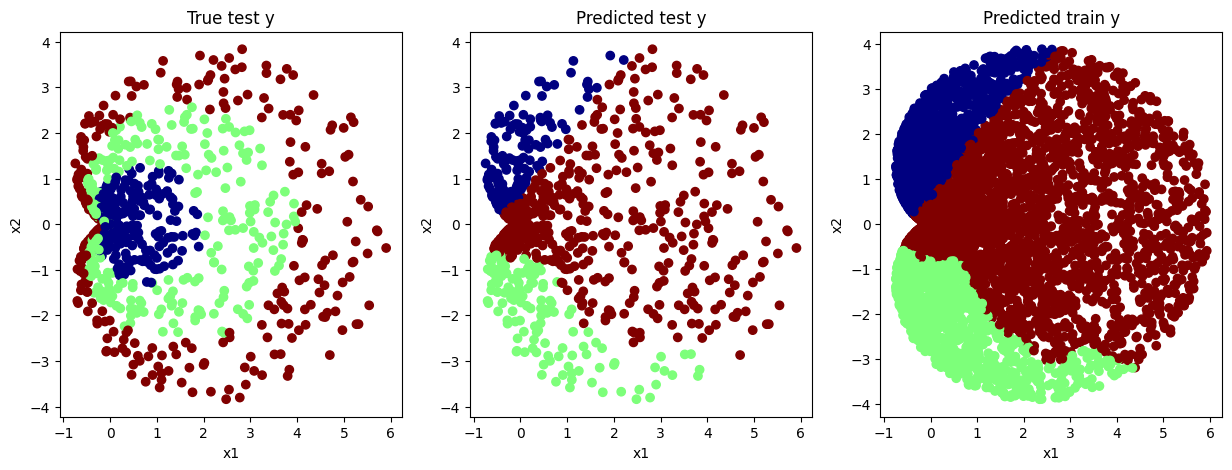

Epoch:  0 Accuracy:  24.6 %


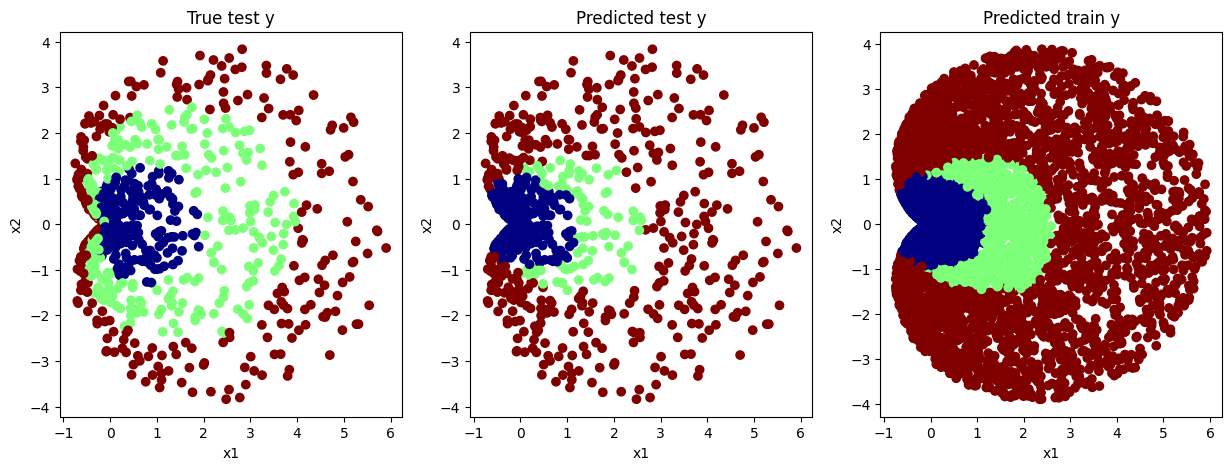

Epoch:  200 Accuracy:  53.800000000000004 %


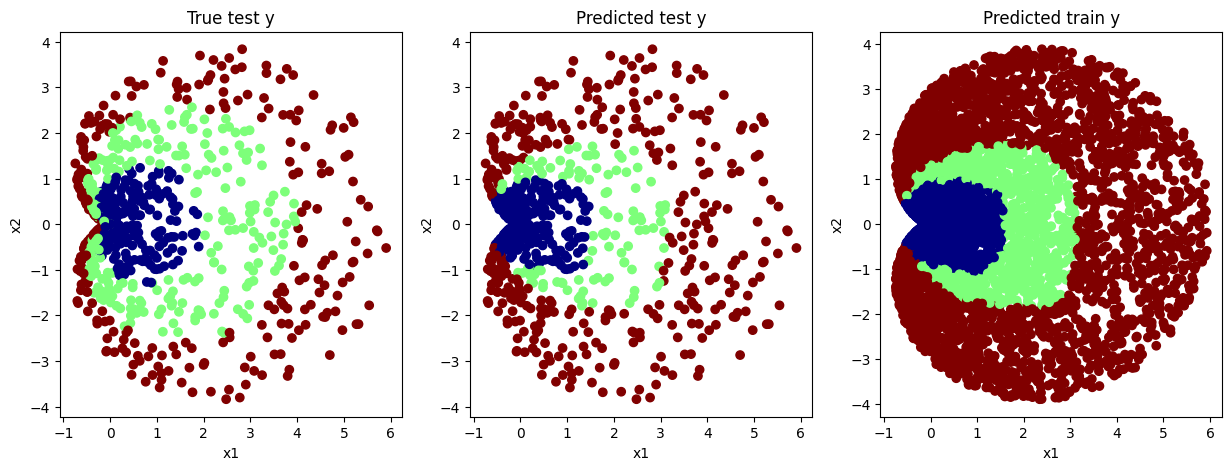

Epoch:  400 Accuracy:  62.5 %


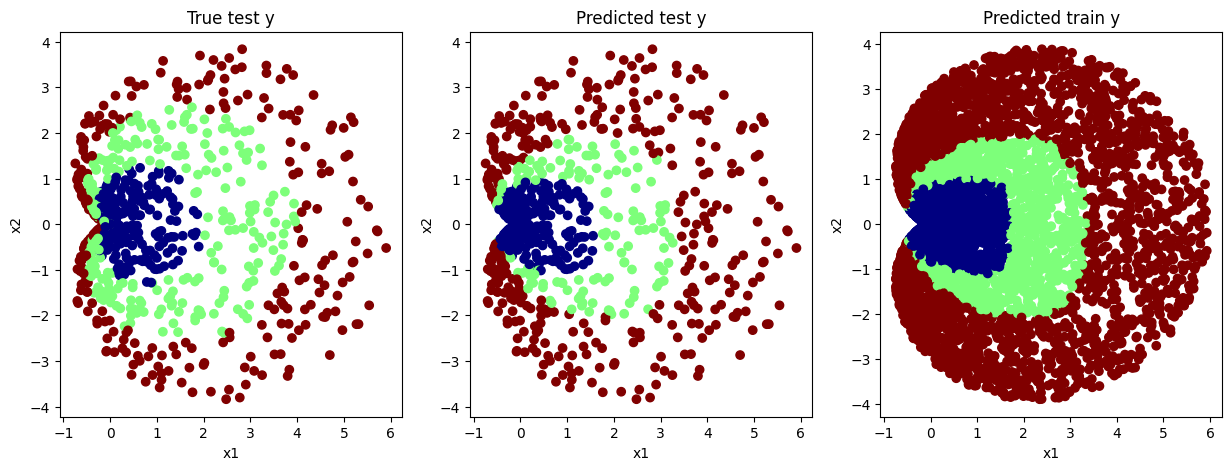

Epoch:  600 Accuracy:  65.3 %


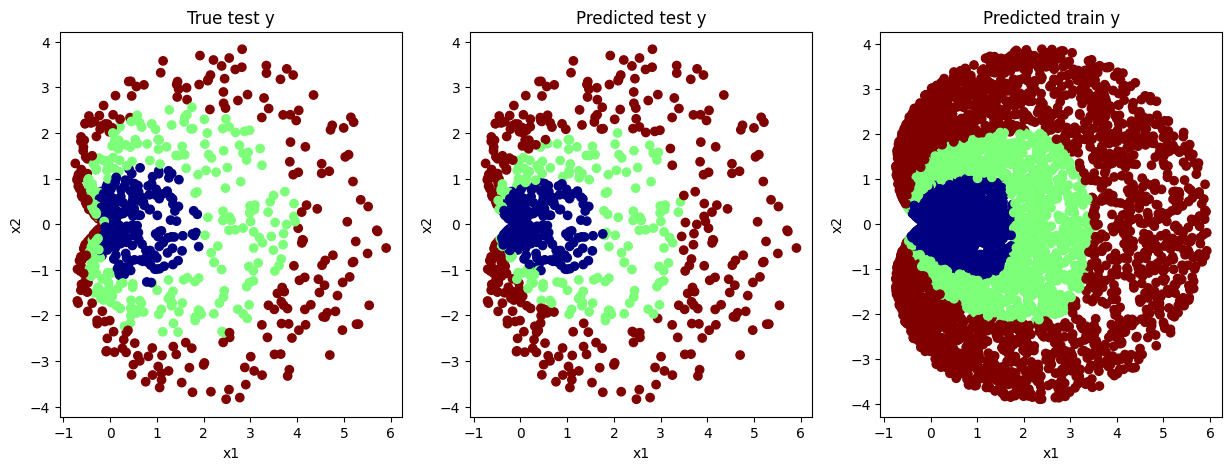

Epoch:  800 Accuracy:  68.0 %


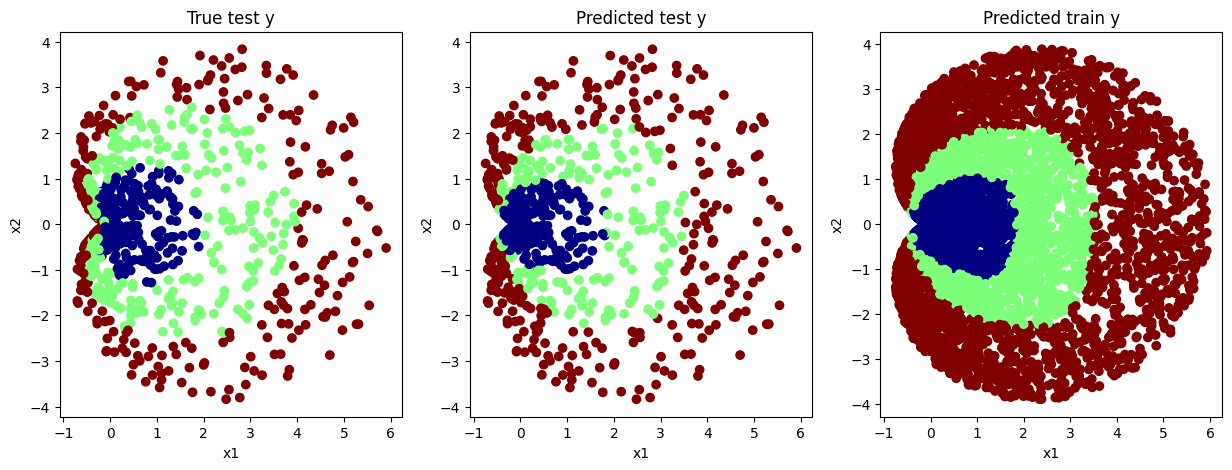

Epoch:  1000 Accuracy:  70.0 %


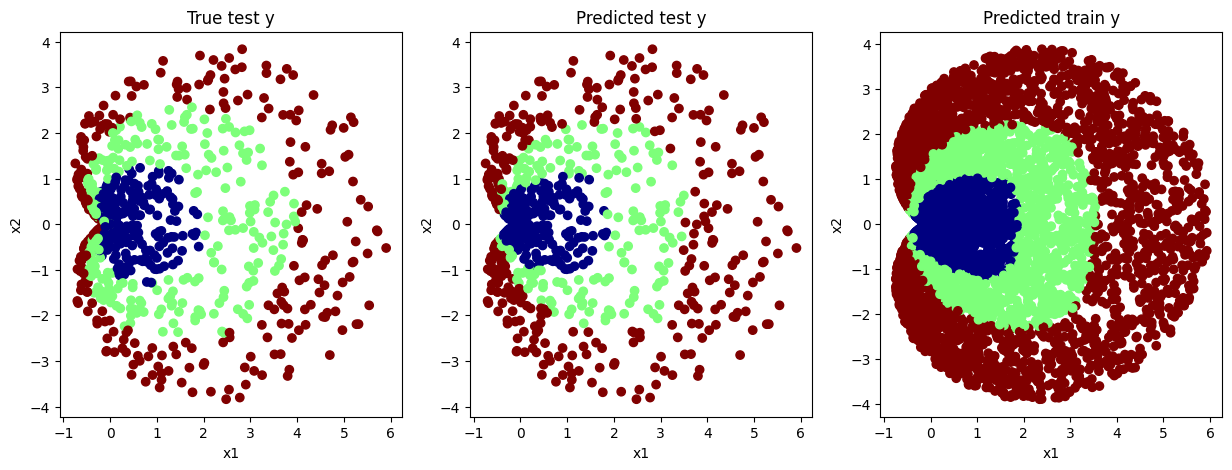

Epoch:  1200 Accuracy:  71.39999999999999 %


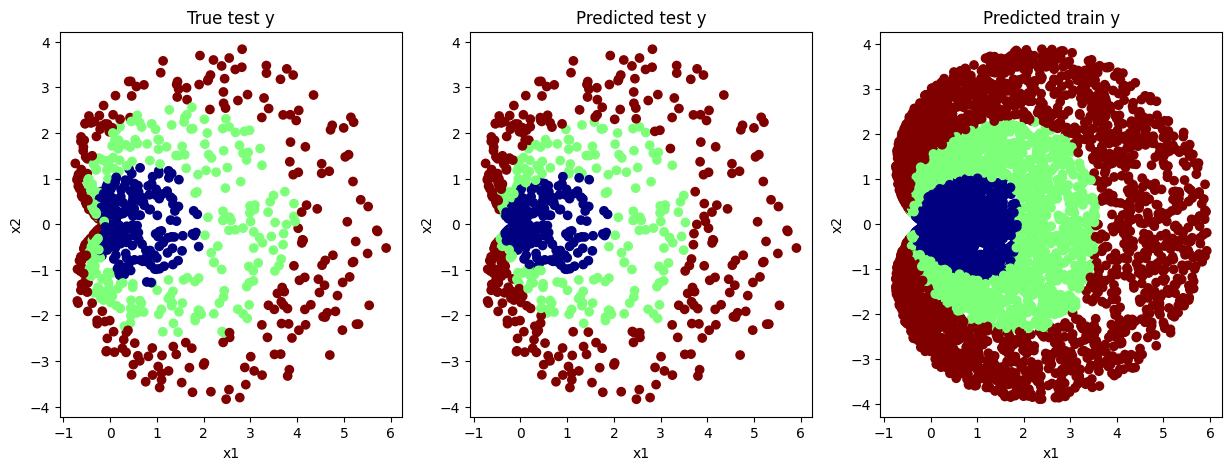

Epoch:  1400 Accuracy:  72.2 %


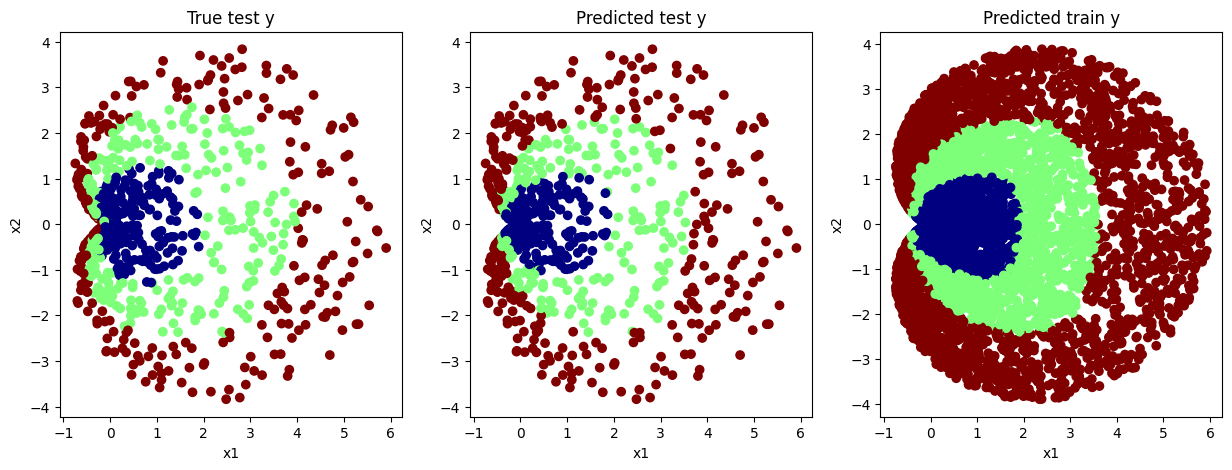

Epoch:  1600 Accuracy:  73.2 %


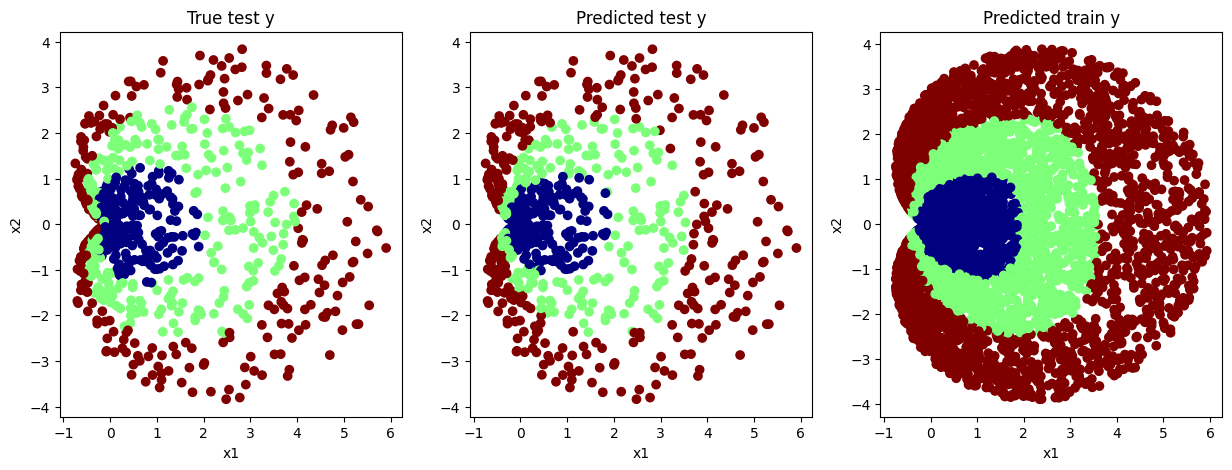

Epoch:  1800 Accuracy:  74.0 %


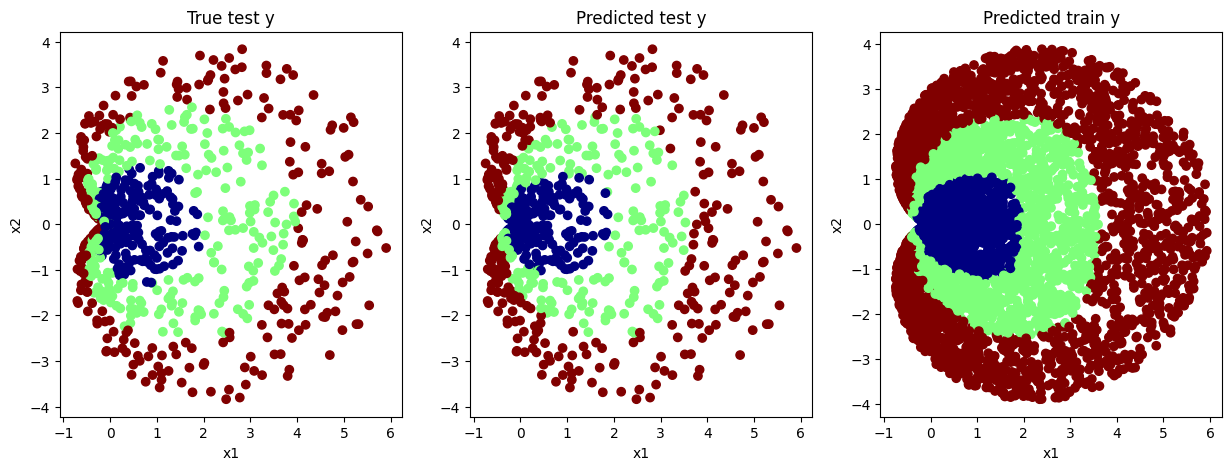

Epoch:  2000 Accuracy:  74.9 %


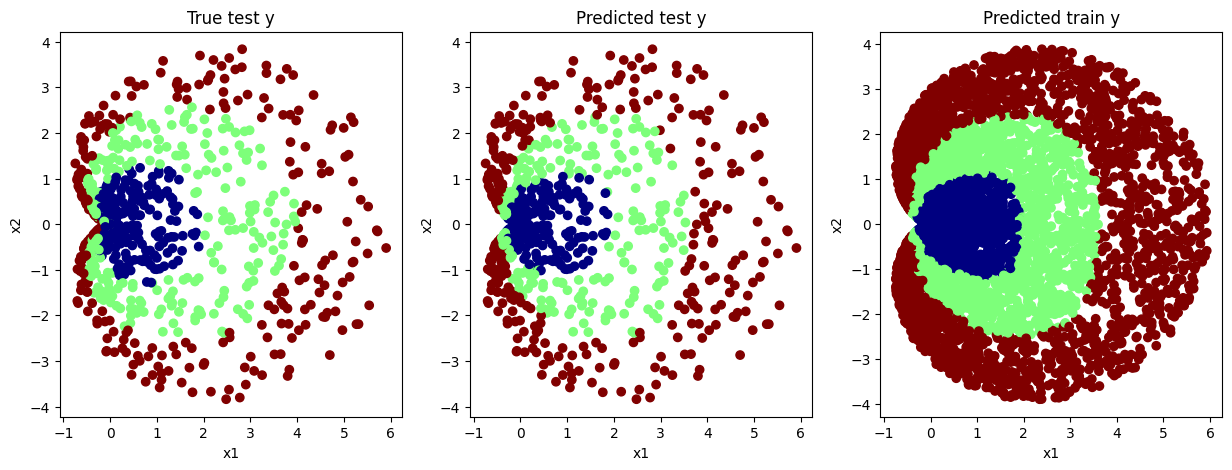

Epoch:  2200 Accuracy:  75.0 %


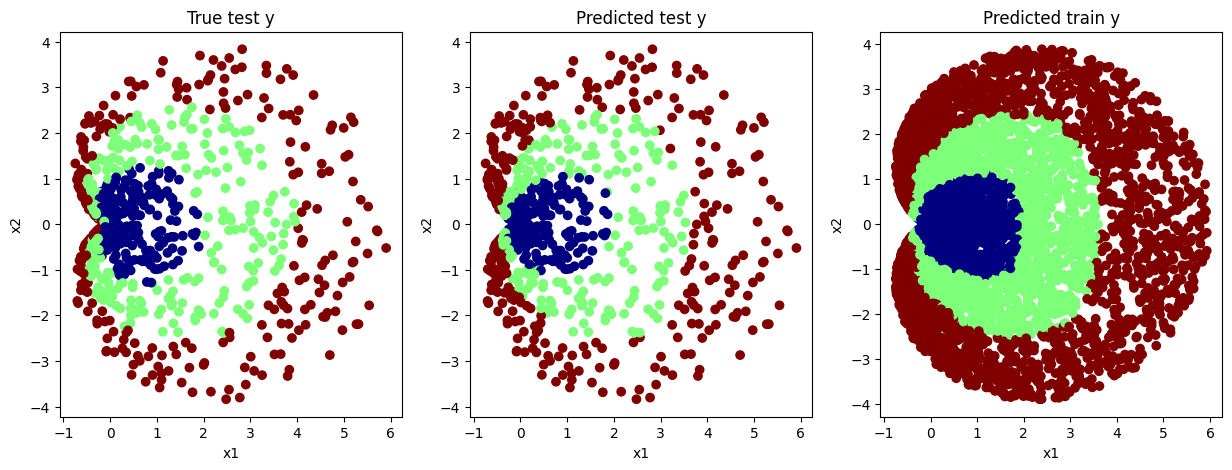

Epoch:  2400 Accuracy:  75.2 %


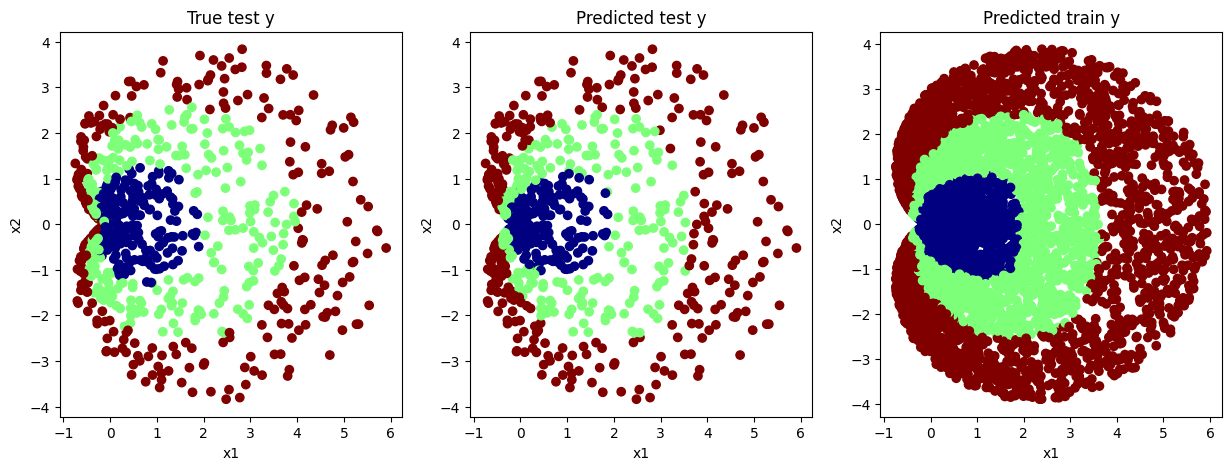

Epoch:  2600 Accuracy:  75.7 %


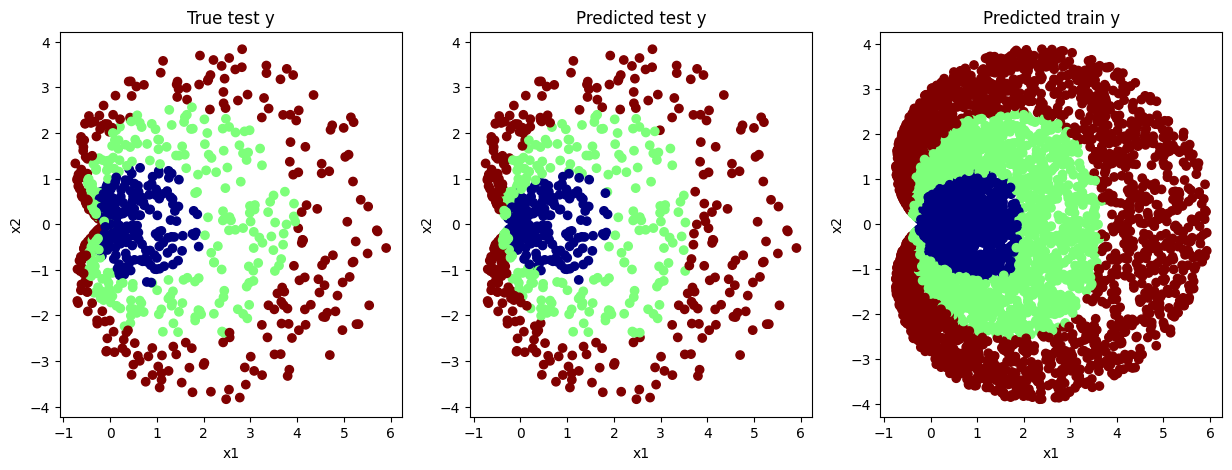

Epoch:  2800 Accuracy:  75.9 %


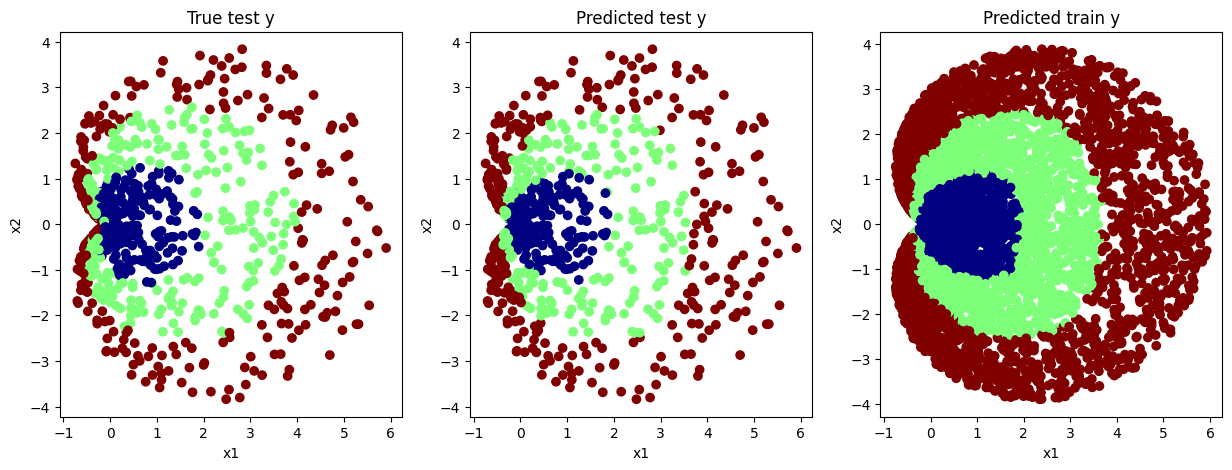

Epoch:  3000 Accuracy:  76.0 %


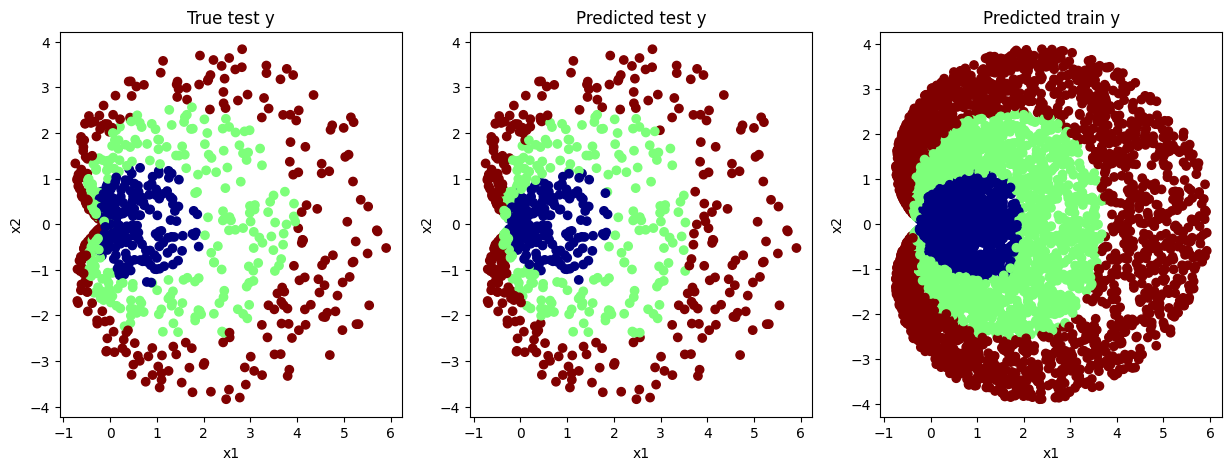

Epoch:  3200 Accuracy:  76.3 %


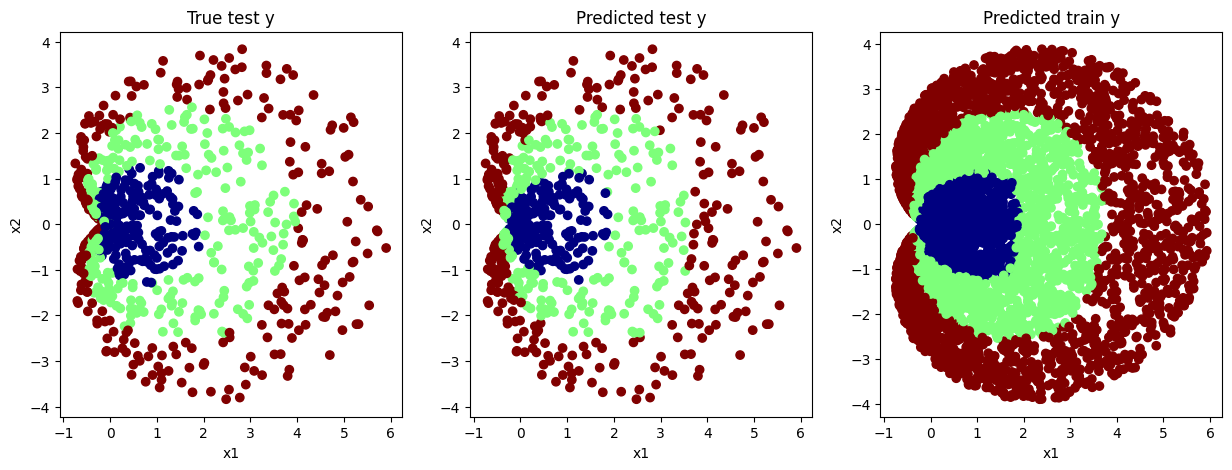

Epoch:  3400 Accuracy:  76.6 %


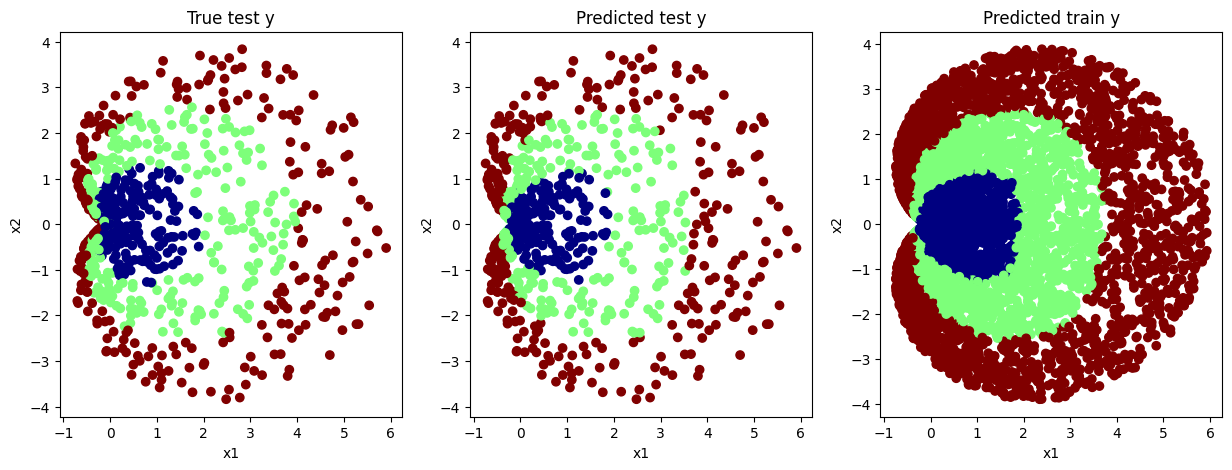

Epoch:  3600 Accuracy:  76.5 %


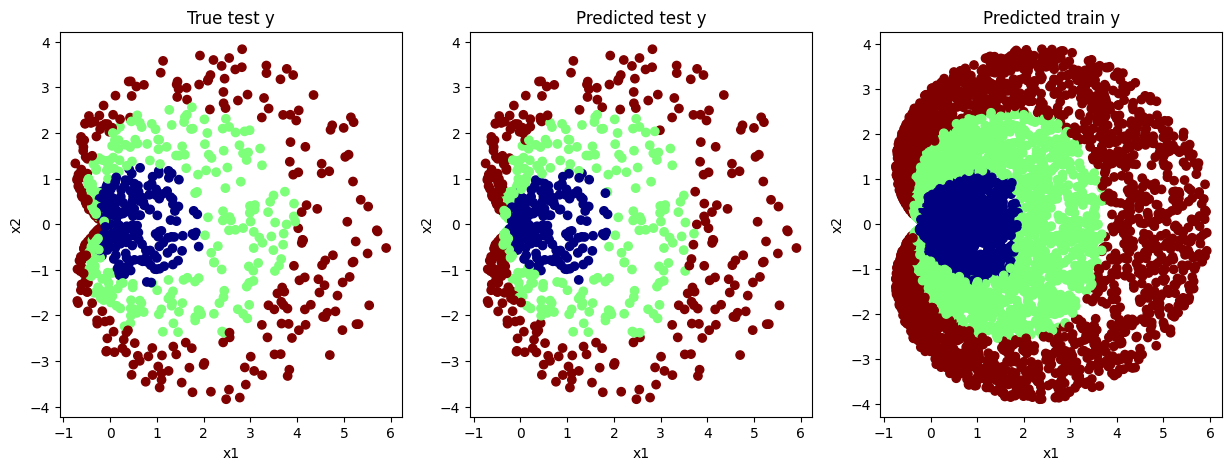

Epoch:  3800 Accuracy:  76.8 %


In [72]:
# 모델 생성
import torch.optim as optim
from sklearn.metrics import accuracy_score

# model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel()
print(f'{sum(p.numel() for p in model.parameters() if p.requires_grad)} Parameters')

# optimizer 생성
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

# 모델 학습

list_epoch = []
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 4000
for i in range(epoch):
   # Trian
  model.train()
  optimizer.zero_grad()
  input_x = torch.Tensor(train_X)
  true_y = torch.Tensor(train_y).long()
  pred_y = model(input_x)
  loss = cls_loss(pred_y, true_y)
  loss.backward()
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy())

  # Validate
  model.eval()
  optimizer.zero_grad()
  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y).long()
  pred_y = model(input_x)
  loss = cls_loss(pred_y, true_y)
  list_val_loss.append(loss.detach().numpy())

  if i % 200 == 0:
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(test_X)
    true_y = torch.Tensor(test_y)
    pred_y = model(input_x).detach().max(dim=1)[1].numpy()
    acc = accuracy_score(true_y, pred_y)
    list_acc.append(acc)
    list_acc_epoch.append(i)

    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='jet')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_title('True test y')

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y, cmap='jet')

    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Predicted test y')

    input_x = torch.Tensor(train_X)
    pred_y = model(input_x).detach().detach().max(dim=1)[1].numpy()

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y, cmap='jet')

    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_title('Predicted train y')

    plt.show()
    print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

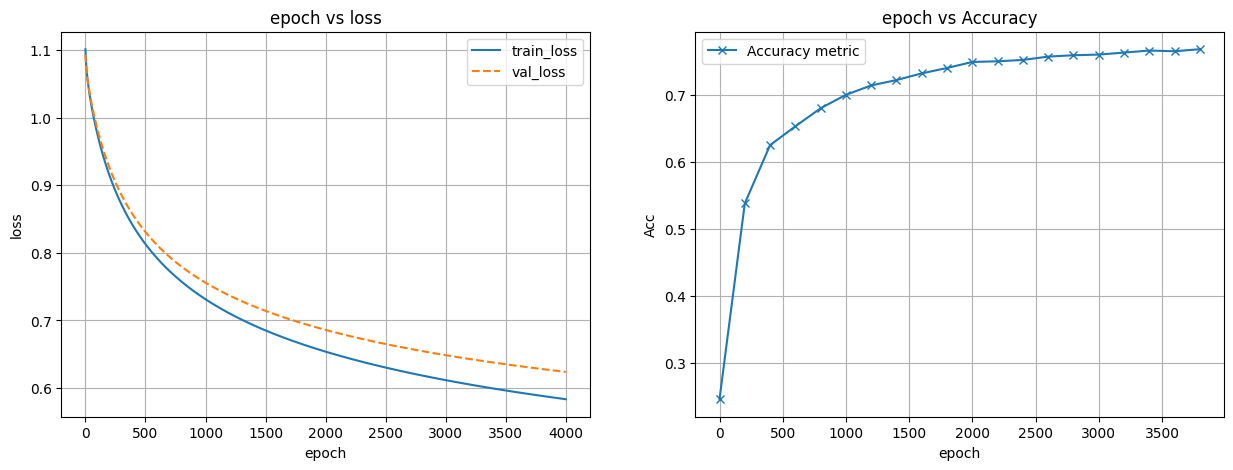

In [73]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()